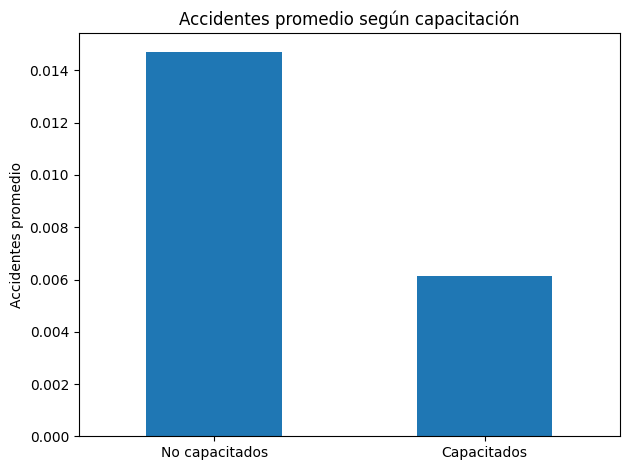

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
empleados = pd.read_excel('/content/empleados_mensual2.xlsx')
eventos = pd.read_excel('/content/eventos_rrhh2.xlsx')
capacitaciones = pd.read_excel('/content/capacitaciones2.xlsx')

# Definir qué subtipo_evento se considera accidente
categorias_accidentes = [
    'Accidente leve',
    'Accidente grave',
    'Corte',
    'Golpe',
    'Quemadura',
    'Lesión'
]

# Filtrar accidentes
accidentes = eventos[eventos['subtipo_evento'].isin(categorias_accidentes)]

# Identificar empleados capacitados
capacitados = capacitaciones['empleado_id'].unique()
empleados['capacitado'] = empleados['empleado_id'].isin(capacitados)

# Contar accidentes por empleado
accidentes_emp = accidentes['empleado_id'].value_counts()
empleados['accidentes'] = empleados['empleado_id'].map(accidentes_emp).fillna(0)

# Comparar promedio de accidentes
resumen = empleados.groupby('capacitado')['accidentes'].mean()
resumen.index = ['No capacitados', 'Capacitados']

# Gráfico
resumen.plot(kind='bar')
plt.title('Accidentes promedio según capacitación')
plt.ylabel('Accidentes promedio')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()